In [77]:
import pandas as pd 
import numpy as np 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFECV

import tqdm
import pprint as pp

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("./Data/final_dummies_add.csv")

In [79]:
df.final_status_coms = df.final_status_coms.apply(lambda x:1 if x == "Action taken on bill" else 0)

In [80]:
df.columns[:20]

Index(['bill_id', 'title', 'sponsor_title', 'sponsor_name', 'sponsor_state',
       'introduced_date', 'cosponsors', 'cosponsors_by_party', 'committees',
       'summary', 'latest_major_action_date', 'congress', 'final_status_5',
       'final_status_3', 'final_status_coms', 'division', 'new_sponsor_match',
       'sponsor_party_rank', 'sponsor_senior_party_member', 'coms_match'],
      dtype='object')

In [81]:
x = df.select_dtypes([int, float, bool]).drop(["final_status_coms", "law_Law"], axis = 1)
y = df.final_status_coms

# Normalize Data

In [82]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [83]:
x = pd.DataFrame(x, columns = (df.select_dtypes([int, float, bool]).drop(["final_status_coms", "law_Law"], axis = 1).columns))

# Bootstrap samples to make classes more equal

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [85]:
train = x_train.join(y_train)
train

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_coms
64588,0.000000,0.7,0.027778,0.078125,0.0,0.0,0.000242,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62395,0.000000,0.7,0.055556,0.046875,0.0,0.0,0.000357,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5617,0.094907,1.0,0.388889,0.000000,0.0,1.0,0.003533,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72149,0.018519,0.3,0.027778,0.000000,1.0,1.0,0.000804,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23704,0.011574,0.4,0.388889,0.000000,0.0,0.0,0.001782,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102525,0.027778,0.6,0.416667,0.000000,0.0,1.0,0.000334,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
53712,0.006944,0.8,0.583333,0.000000,0.0,0.0,0.003610,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
34575,0.245370,0.9,0.444444,0.000000,1.0,1.0,0.001424,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
111764,0.023148,0.1,0.111111,0.000000,0.0,1.0,0.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [86]:
train.final_status_coms.value_counts(normalize = True)

0    0.823988
1    0.176012
Name: final_status_coms, dtype: float64

In [87]:
sample = resample(train[train['final_status_coms'] == 1], replace = True, n_samples = 55_000, random_state = 13)

In [88]:
train_samples = pd.concat([train, sample])

In [89]:
train_samples['final_status_coms'].value_counts(normalize = True)

1    0.501173
0    0.498827
Name: final_status_coms, dtype: float64

In [90]:
train_samples

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_coms
64588,0.000000,0.7,0.027778,0.078125,0.0,0.0,0.000242,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62395,0.000000,0.7,0.055556,0.046875,0.0,0.0,0.000357,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5617,0.094907,1.0,0.388889,0.000000,0.0,1.0,0.003533,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72149,0.018519,0.3,0.027778,0.000000,1.0,1.0,0.000804,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23704,0.011574,0.4,0.388889,0.000000,0.0,0.0,0.001782,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,0.087963,0.4,0.166667,0.000000,0.0,1.0,0.000571,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
65833,0.002315,0.7,0.111111,0.000000,1.0,0.0,0.000618,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23927,0.009259,0.4,0.277778,0.000000,1.0,1.0,0.003058,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
40257,0.000000,0.9,0.083333,0.031250,1.0,0.0,0.000696,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [91]:
x_train = train_samples.drop("final_status_coms", axis = 1)
y_train = train_samples.final_status_coms

# Feature Selection

In [92]:
# lr = LogisticRegression()

# rfe = RFECV(lr, step = 1, cv = 5, n_jobs = 4)

# rfe.fit(x_train, y_train)

# rfe.support_

# rfe.ranking_

# arr = rfe.support_
# arr = np.where(arr)[0]

# x_train_good = x_train.iloc[:, arr]

# x_test_good = x_test.iloc[:, arr]

# Logistic Regression

In [93]:
lr = LogisticRegression(penalty = "l2")

lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))

lr.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7720825112107623


0.7577244444444444

In [94]:
preds = lr.predict(x_test)

In [95]:
preds

array([1, 0, 0, ..., 1, 0, 0])

In [96]:
clm = classification_report(y_test, preds)
pp.pprint(clm)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.75      0.84     23223\n'
 '           1       0.40      0.78      0.53      4902\n'
 '\n'
 '    accuracy                           0.76     28125\n'
 '   macro avg       0.67      0.76      0.68     28125\n'
 'weighted avg       0.85      0.76      0.78     28125\n')


In [97]:
cm = confusion_matrix(y_test, preds)
cm

array([[17509,  5714],
       [ 1100,  3802]])

In [98]:
probas = lr.predict_proba(x_test)

([array([ 918., 2365., 2041., 2116., 2076., 2358., 2768., 3245., 4346.,
         5892.]),
  array([5892., 4346., 3245., 2768., 2358., 2076., 2116., 2041., 2365.,
          918.])],
 array([1.94568806e-11, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

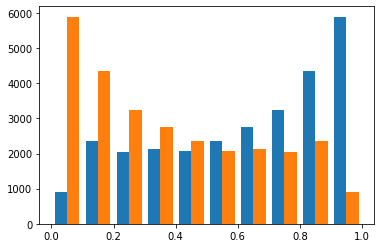

In [99]:
plt.hist(probas)

In [100]:
import numpy as np

In [101]:
thresh = np.arange(0, 1.05, .05)

In [102]:
precisions = []
recalls = []

for t in thresh:
    predict_pos = probas[:,1]>=t
    trues = ((predict_pos == 1) & (y_test == 1)).sum()
    falses = ((predict_pos == 1) & (y_test == 0)).sum()
    false_neg = ((predict_pos == 0) & (y_test == 1)).sum()
    precision = trues/(trues + falses)
    precisions.append(precision)
    recall = trues / (trues + false_neg)
    recalls.append(recall)
    
    print(f"{t} -- precision: {precision}, recall:{recall}")

0.0 -- precision: 0.17429333333333333, recall:1.0
0.05 -- precision: 0.1938294585924195, recall:0.9983680130558955
0.1 -- precision: 0.21863896010434938, recall:0.9916360669114647
0.15000000000000002 -- precision: 0.24077982112350518, recall:0.9775601795185639
0.2 -- precision: 0.2634315424610052, recall:0.9612403100775194
0.25 -- precision: 0.2850787766450417, recall:0.9412484700122399
0.30000000000000004 -- precision: 0.3071301734735692, recall:0.9173806609547124
0.35000000000000003 -- precision: 0.3297694874127995, recall:0.8871889024887801
0.4 -- precision: 0.3541350850597945, recall:0.8578131374949001
0.45 -- precision: 0.3773638159751623, recall:0.8182374541003672
0.5 -- precision: 0.3995376208490963, recall:0.7756017951856385
0.55 -- precision: 0.42328605200945624, recall:0.7305181558547532
0.6000000000000001 -- precision: 0.4520161290322581, recall:0.686046511627907
0.65 -- precision: 0.48049701163888014, recall:0.6232150142798858
0.7000000000000001 -- precision: 0.512960180315

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


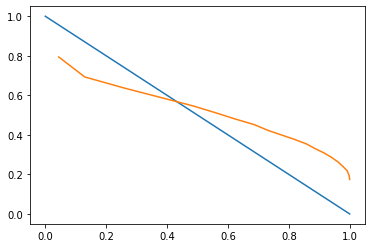

In [103]:
plt.plot([0, 1], [1, 0])
plt.plot(recalls, precisions);

# Random Forest Model

In [104]:
rf = RandomForestClassifier(max_depth = 12, max_features = 10, n_estimators = 100)

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))

rf.score(x_test, y_test)

0.8206636771300448


0.7950577777777778

In [105]:
preds = rf.predict(x_test)

clm = classification_report(y_test, preds)
pp.pprint(clm)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.95      0.80      0.87     23223\n'
 '           1       0.45      0.78      0.57      4902\n'
 '\n'
 '    accuracy                           0.80     28125\n'
 '   macro avg       0.70      0.79      0.72     28125\n'
 'weighted avg       0.86      0.80      0.81     28125\n')


In [106]:
cm = confusion_matrix(y_test, preds)
cm

array([[18517,  4706],
       [ 1058,  3844]])

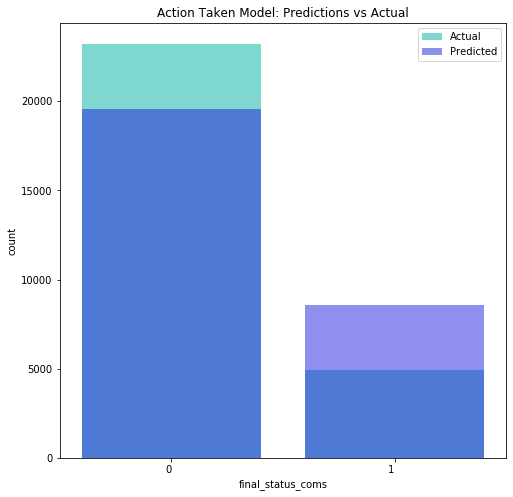

In [123]:
plt.figure(figsize= (8, 8))
plt.title("Action Taken Model: Predictions vs Actual")
plt.xticks(horizontalalignment="right") 
sns.countplot(y_test, color = "turquoise", alpha = .75, label = "Actual", orient="v")
sns.countplot(preds, color = "blue", alpha = .5, label = "Predicted", orient = "v")
plt.legend();

In [108]:
preds.sum()/len(preds)

0.304

In [109]:
y_test.value_counts(normalize = True)

0    0.825707
1    0.174293
Name: final_status_coms, dtype: float64

In [110]:
(probas[:, 1] > .55).sum()/len(probas)

0.3008

In [111]:
preds_48 = (probas[:, 1] > .45)

In [112]:
clm = classification_report(y_test, preds_48)
pp.pprint(clm)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.95      0.72      0.82     23223\n'
 '           1       0.38      0.82      0.52      4902\n'
 '\n'
 '    accuracy                           0.73     28125\n'
 '   macro avg       0.66      0.77      0.67     28125\n'
 'weighted avg       0.85      0.73      0.76     28125\n')


In [113]:
# check ROC curve

In [115]:
probas = rf.predict_proba(x_test)

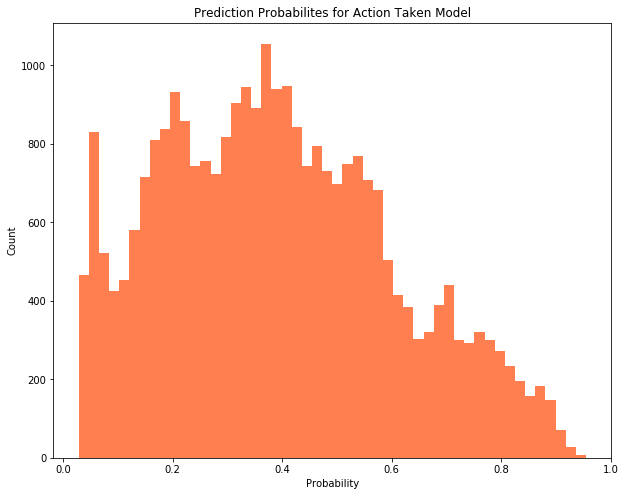

In [118]:
plt.figure(figsize = (10, 8))
plt.title("Prediction Probabilites for Action Taken Model")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.hist(probas[:, 1], bins = 50, color = "coral");

In [41]:
precisions = []
recalls = []

for t in thresh:
    predict_pos = probas[:,1]>=t
    trues = ((predict_pos == 1) & (y_test == 1)).sum()
    falses = ((predict_pos == 1) & (y_test == 0)).sum()
    false_neg = ((predict_pos == 0) & (y_test == 1)).sum()
    precision = trues/(trues + falses)
    precisions.append(precision)
    recall = trues / (trues + false_neg)
    recalls.append(recall)
    
    print(f"{t} -- precision: {precision}, recall:{recall}")

0.0 -- precision: 0.17742222222222223, recall:1.0
0.05 -- precision: 0.1849518161601186, recall:1.0
0.1 -- precision: 0.19265239898014372, recall:0.9993987975951903
0.15000000000000002 -- precision: 0.20462574973297182, recall:0.9981963927855712
0.2 -- precision: 0.2228107186139414, recall:0.9947895791583167
0.25 -- precision: 0.2453083777191498, recall:0.9875751503006012
0.30000000000000004 -- precision: 0.268590026478376, recall:0.975751503006012
0.35000000000000003 -- precision: 0.30375470134506277, recall:0.9549098196392786
0.4 -- precision: 0.3524974986531209, recall:0.9178356713426854
0.45 -- precision: 0.404997642621405, recall:0.8607214428857716
0.5 -- precision: 0.4590125756870051, recall:0.7899799599198397
0.55 -- precision: 0.527588813303099, recall:0.6993987975951904
0.6000000000000001 -- precision: 0.6066652952067476, recall:0.5909819639278557
0.65 -- precision: 0.6568265682656826, recall:0.4993987975951904
0.7000000000000001 -- precision: 0.7223952924887505, recall:0.4182

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


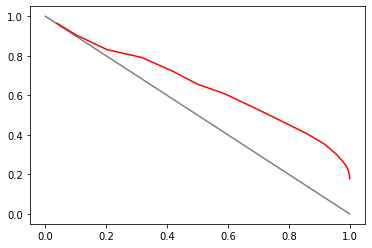

In [42]:
plt.plot([0, 1], [1, 0], color='gray')
plt.plot(recalls, precisions, color='red');

In [43]:
#adjust threshold?

In [44]:
threshold = 0.4

probas [:,0] = (probas [:,0] < threshold).astype('int')
probas [:,1] = (probas [:,1] >= threshold).astype('int')

preds = probas[:,1]

# Gridsearch RandomForest

In [45]:
# params = {"n_estimators": [100, 200, 300],
#          "max_depth":[5, 8, 10, 12], 
#           "max_features":[10, 15, 20]
#          }

# grid_rf = GridSearchCV(rf, param_grid=params, n_jobs = 4)

In [46]:
#grid_rf.fit(x_train_good, y_train)

In [47]:
#grid_rf.best_score_

In [48]:
#grid_rf.best_params_

# Adaboost model

In [49]:
ada = AdaBoostClassifier()

ada.fit(x_train, y_train)

print(ada.score(x_train, y_train))

ada.score(x_test, y_test)

0.772132735426009


0.7677866666666666

In [50]:
preds = ada.predict(x_test)

In [51]:
clm = classification_report(y_test, preds)
pp.pprint(clm)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.77      0.84     23135\n'
 '           1       0.42      0.78      0.54      4990\n'
 '\n'
 '    accuracy                           0.77     28125\n'
 '   macro avg       0.68      0.77      0.69     28125\n'
 'weighted avg       0.85      0.77      0.79     28125\n')


# Take it to the next level

In [52]:
mini = df[df["final_status_coms"] == 1]

In [53]:
mini["final_status_5"].value_counts()

Passed one chamber          6418
Referred to full chamber    6093
Law!                        3907
Action in committee         3335
Name: final_status_5, dtype: int64

In [54]:
mini.columns

Index(['bill_id', 'title', 'sponsor_title', 'sponsor_name', 'sponsor_state',
       'introduced_date', 'cosponsors', 'cosponsors_by_party', 'committees',
       'summary',
       ...
       'clean_committees_Rules and Administration', 'clean_committees_Science',
       'clean_committees_Science and Technology',
       'clean_committees_Science, Space, and Technology',
       'clean_committees_Small Business',
       'clean_committees_Small Business and Entrepreneurship',
       'clean_committees_Standards of Official Conduct',
       'clean_committees_Transportation and Infrastructure',
       'clean_committees_Ways and Means', 'law_Law'],
      dtype='object', length=123)

In [55]:
mini['law_Law']

0         0
1         0
2         1
3         0
4         0
         ..
112441    1
112448    0
112466    1
112472    1
112499    0
Name: law_Law, Length: 19753, dtype: int64

In [56]:
x = mini.select_dtypes([int, bool, float]).drop(["law_Law", "final_status_coms"], axis = 1)
y = mini.final_status_5

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [57]:
y_train

31274           Passed one chamber
83033           Passed one chamber
34005     Referred to full chamber
94756     Referred to full chamber
100139    Referred to full chamber
                    ...           
73417                         Law!
18259           Passed one chamber
74970           Passed one chamber
54549           Passed one chamber
17861                         Law!
Name: final_status_5, Length: 14814, dtype: object

In [58]:
train = x_train.join(y_train)

In [59]:
train.columns

Index(['cosponsors', 'congress', 'sponsor_party_rank',
       'sponsor_senior_party_member', 'coms_match', 'bipartisan',
       'summary_length', 'sponsor_majority', 'united_congress',
       'sponsor_pres_party_match',
       ...
       'clean_committees_Rules and Administration', 'clean_committees_Science',
       'clean_committees_Science and Technology',
       'clean_committees_Science, Space, and Technology',
       'clean_committees_Small Business',
       'clean_committees_Small Business and Entrepreneurship',
       'clean_committees_Standards of Official Conduct',
       'clean_committees_Transportation and Infrastructure',
       'clean_committees_Ways and Means', 'final_status_5'],
      dtype='object', length=105)

In [60]:
statuses = ["Passed one chamber", "Referred to full chamber", "Action in committee", "Law!"]

bootstrapped = []
for status in statuses:
    sample = resample(train[train['final_status_5'] == status], replace = True, n_samples = 50_000, random_state = 13)
    bootstrapped.append(sample)

In [61]:
samples = pd.concat(bootstrapped)

In [62]:
train = pd.concat([train, samples])

In [63]:
train

,cosponsors,congress,sponsor_party_rank,sponsor_senior_party_member,coms_match,bipartisan,summary_length,sponsor_majority,united_congress,sponsor_pres_party_match,...,clean_committees_Rules and Administration,clean_committees_Science,clean_committees_Science and Technology,"clean_committees_Science, Space, and Technology",clean_committees_Small Business,clean_committees_Small Business and Entrepreneurship,clean_committees_Standards of Official Conduct,clean_committees_Transportation and Infrastructure,clean_committees_Ways and Means,final_status_5
31274,6,109,7,0,0,True,2317,1,1,1,...,0,0,0,0,0,0,0,0,0,Passed one chamber
83033,1,110,1,5,0,False,1196,1,1,0,...,0,0,0,0,0,0,0,0,0,Passed one chamber
34005,3,114,2,10,1,False,6925,0,1,1,...,0,0,0,0,1,0,0,0,0,Referred to full chamber
94756,55,111,7,5,0,False,16181,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to full chamber
100139,58,111,20,0,0,True,84,1,1,0,...,0,0,0,0,0,0,0,0,0,Referred to full chamber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62196,1,112,4,0,0,False,279,1,0,0,...,0,0,0,0,0,0,0,0,0,Law!
54823,4,113,3,0,1,True,2471,1,0,0,...,0,0,0,0,0,0,0,0,0,Law!
84933,5,110,6,0,1,True,3610,1,1,0,...,0,0,0,0,0,0,0,0,0,Law!
108306,0,106,7,0,0,False,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Law!


In [64]:
x_train = train.drop("final_status_5", axis = 1)
y_train = train.final_status_5

In [65]:
# Logistic Regression

lr = LogisticRegression()

lr.fit(x_train, y_train)

print(lr.score(x_train, y_train))

lr.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5799808206169058


0.5723830734966593

In [66]:
preds = lr.predict(x_test)

preds

clm = classification_report(y_test, preds)
pp.pprint(clm)

('                          precision    recall  f1-score   support\n'
 '\n'
 '     Action in committee       0.50      0.66      0.57       867\n'
 '                    Law!       0.42      0.57      0.49       947\n'
 '      Passed one chamber       0.70      0.49      0.57      1637\n'
 'Referred to full chamber       0.67      0.62      0.64      1488\n'
 '\n'
 '                accuracy                           0.57      4939\n'
 '               macro avg       0.57      0.58      0.57      4939\n'
 '            weighted avg       0.60      0.57      0.58      4939\n')


In [67]:
cm = confusion_matrix(y_test, preds)
cm

array([[571,  85,  59, 152],
       [135, 544, 170,  98],
       [171, 464, 794, 208],
       [260, 201, 109, 918]])

# Random Forest Model

In [68]:
rf = RandomForestClassifier(max_depth = 10)

rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))

rf.score(x_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6802582699451618


0.623000607410407

In [69]:
#do a gridsearch 

In [70]:
preds = rf.predict(x_test)

clm = classification_report(y_test, preds)
pp.pprint(clm)

('                          precision    recall  f1-score   support\n'
 '\n'
 '     Action in committee       0.54      0.66      0.59       867\n'
 '                    Law!       0.47      0.46      0.47       947\n'
 '      Passed one chamber       0.69      0.70      0.69      1637\n'
 'Referred to full chamber       0.71      0.62      0.66      1488\n'
 '\n'
 '                accuracy                           0.62      4939\n'
 '               macro avg       0.60      0.61      0.60      4939\n'
 '            weighted avg       0.63      0.62      0.62      4939\n')


In [71]:
cm = confusion_matrix(y_test, preds)
cm

array([[ 569,   82,   96,  120],
       [ 113,  439,  295,  100],
       [  85,  251, 1152,  149],
       [ 279,  155,  137,  917]])

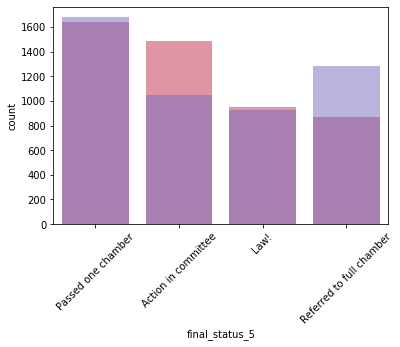

In [72]:
plt.xticks(rotation = 45)
sns.countplot(y_test, color = "crimson", alpha = .5)
sns.countplot(preds, color = "slateblue", alpha = .5);

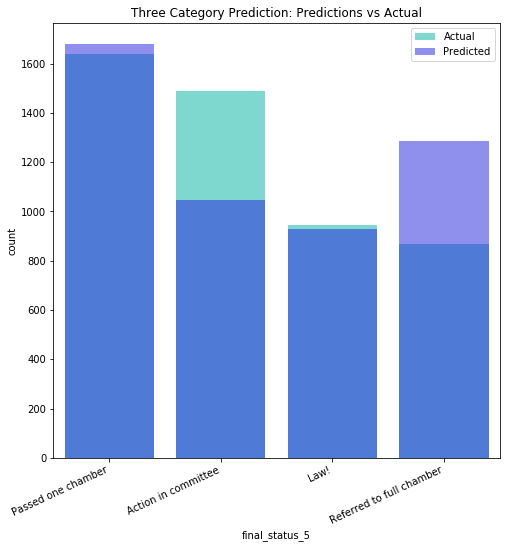

In [75]:
plt.figure(figsize= (8, 8))
plt.title("Four Category Prediction: Predictions vs Actual")
plt.xticks(rotation = 25, horizontalalignment="right") 
sns.countplot(y_test, color = "turquoise", alpha = .75, label = "Actual", orient="v")
sns.countplot(preds, color = "blue", alpha = .5, label = "Predicted", orient = "v")
plt.legend();